# EDA and Stakeholder Questions Notebook

In [44]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [45]:
# Any Function Definitions Go HERE



In [46]:
# read in the processed data
cleaned_tweets = pd.read_csv('../data/cleaned_tweets.csv')
print(cleaned_tweets.shape)
cleaned_tweets.head(3)

(8699, 6)


,tweet_text,labeled_brand_or_product,detected_emotion,sentiment,brand,tweet_char_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Negative,Apple,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Positive,Apple,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Positive,Apple,79


## Question 1: What is the general sentiment breakdown for these Tweets?
### How many/what percentage Positive/Negative/Neutral?


In [131]:
by_sentiment = cleaned_tweets.groupby(['sentiment'])['tweet_text'].count()
by_sentiment.sort_values(ascending=False, inplace=True)

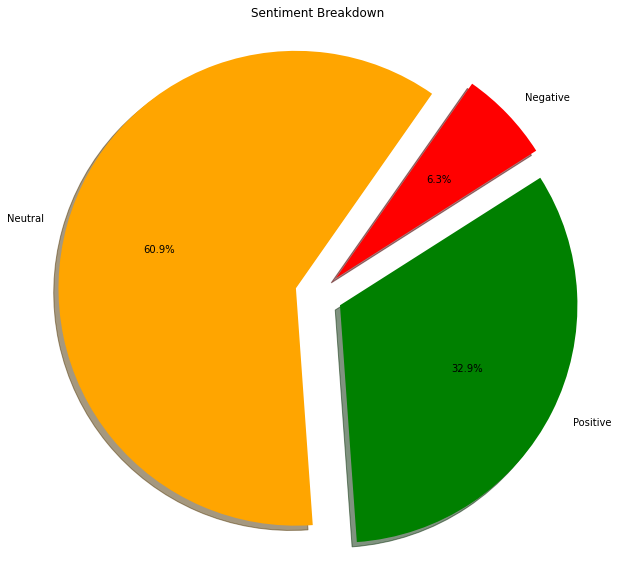

In [133]:
plfig = plt.figure(figsize = (10, 10))
my_explode = (0.1, 0.1, 0.1)
my_colors = ['orange', 'green', 'red']
plt.pie(by_sentiment, labels=by_sentiment.index, autopct='%1.1f%%', startangle=55, shadow =True, colors=my_colors, explode=my_explode)
plt.title('Sentiment Breakdown')
plt.axis('equal')
plt.rcParams.update({'font.size': 16})
plt.show()

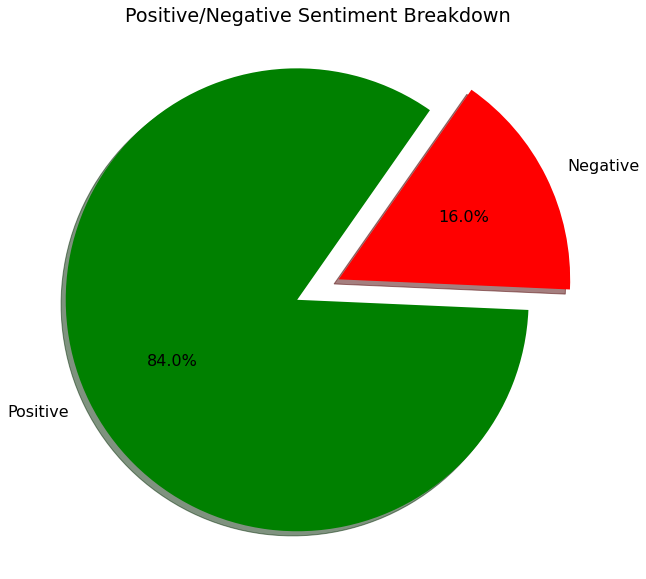

In [140]:
by_sentiment_neg_pos_only = cleaned_tweets[cleaned_tweets['sentiment'] != 'Neutral'].groupby(['sentiment'])['tweet_text'].count()
by_sentiment_neg_pos_only.sort_values(ascending=False, inplace=True)

plfig = plt.figure(figsize = (10, 10))
my_explode = (0.1, 0.1)
my_colors = ['green', 'red']
plt.pie(by_sentiment_neg_pos_only, labels=by_sentiment_neg_pos_only.index, autopct='%1.1f%%', startangle=55, shadow =True, colors=my_colors, explode=my_explode)
plt.title('Positive/Negative Sentiment Breakdown')
plt.axis('equal')
plt.rcParams.update({'font.size': 16})
plt.show()

### Q1 Insights/Recommendations:
* Overall, the majority of the tweets are neutral. I am looking to create a binary classifier using only Positive/Negative sentiment. Be aware of too little training data.
* There is a class inbalance issue here with more Positive than Negative labeled tweets. Be aware of this when training the classifier.


## Question 2: Are the two companies represented equally in the labeled data?
### Percent Google? Percent Apple?  Out of all, out of all where not UNKNOWN?

In [106]:
by_brand = cleaned_tweets.groupby('brand')['tweet_text'].count()
by_brand.sort_values(ascending=False, inplace=True)

In [107]:
by_brand

brand
Apple      5140
Google     2638
UNKNOWN     715
BOTH        205
Name: tweet_text, dtype: int64

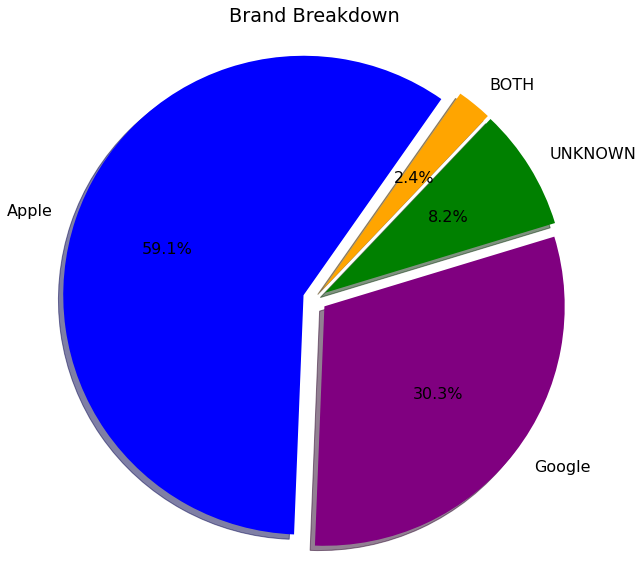

In [112]:
plfig = plt.figure(figsize = (10, 10))
my_explode = (0.05, 0.05, 0.05, 0.05)
my_colors = ['blue', 'purple', 'green', 'orange']
plt.pie(by_brand, labels=by_brand.index, autopct='%1.1f%%', startangle=55, shadow =True, colors=my_colors, explode=my_explode)
plt.title('Brand Breakdown')
plt.axis('equal')
plt.rcParams.update({'font.size': 16})
plt.show()


### Q2 Insights/Recommendations:
* Apple is the most mentioned brand, followed by Google, then Unknown. A small percentage of tweets mention both brands.
* It will be interesting to see if any brand name mentions factor into the sentiment classifier.

## Question 3: What insights can the data provide for specific Brands?
### Breakdown of brand and sentiment where not UNKNOWN
### Average char count for brand and sentiment where not UNKNOWN

In [124]:
by_sentiment_brand = cleaned_tweets[cleaned_tweets['brand'] != 'UNKNOWN'].groupby(['sentiment', 'brand'])['tweet_text'].count()
by_sentiment_brand.sort_index()

sentiment  brand 
Negative   Apple      398
           BOTH         3
           Google     142
Neutral    Apple     2694
           BOTH       192
           Google    1706
Positive   Apple     2048
           BOTH        10
           Google     790
Name: tweet_text, dtype: int64

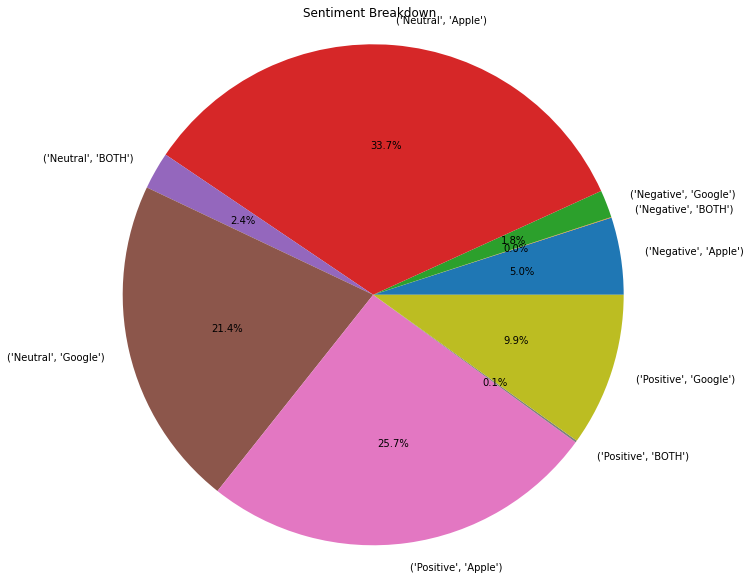

In [130]:
plfig = plt.figure(figsize = (10, 10))
#my_explode = (0.1, 0.1, 0.1)
#my_colors = ['orange', 'green', 'red']
#plt.pie(by_sentiment, labels=by_sentiment.index, autopct='%1.1f%%', startangle=55, shadow =True, colors=my_colors, explode=my_explode)
plt.pie(by_sentiment_brand, labels=by_sentiment_brand.index, autopct='%1.1f%%')
plt.title('Sentiment Breakdown')
plt.axis('equal')
plt.rcParams.update({'font.size': 10})
plt.show()

In [113]:
brand_by_sentiment = cleaned_tweets[cleaned_tweets['brand'] != 'UNKNOWN'].groupby(['brand', 'sentiment'])['tweet_text'].count()
brand_by_sentiment

brand   sentiment
Apple   Negative      398
        Neutral      2694
        Positive     2048
BOTH    Negative        3
        Neutral       192
        Positive       10
Google  Negative      142
        Neutral      1706
        Positive      790
Name: tweet_text, dtype: int64

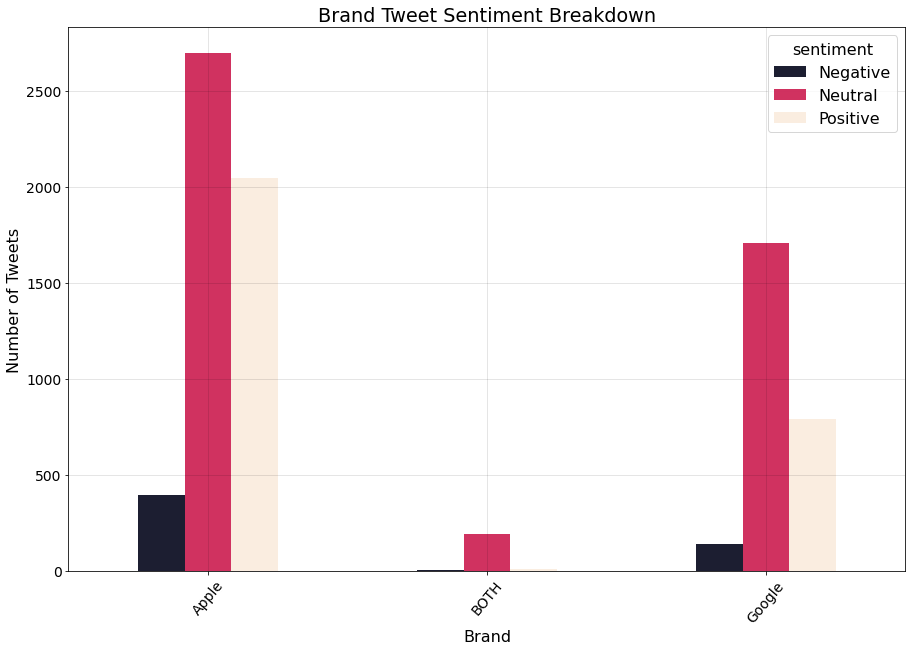

In [141]:
brand_by_sentiment.unstack().plot.bar(fontsize=14, rot=50, alpha = 0.90, figsize=(15,10), colormap='rocket', title='Brand Tweet Sentiment Breakdown')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.show()



In [87]:
wordcount_by_sentiment = cleaned_tweets[cleaned_tweets['brand'] != 'UNKNOWN'].groupby(['brand', 'sentiment'])['tweet_char_count'].mean().round()
wordcount_by_sentiment

brand   sentiment
Apple   Negative     108.0
        Neutral      104.0
        Positive     105.0
BOTH    Negative     126.0
        Neutral      115.0
        Positive     122.0
Google  Negative     114.0
        Neutral      106.0
        Positive     108.0
Name: tweet_char_count, dtype: float64

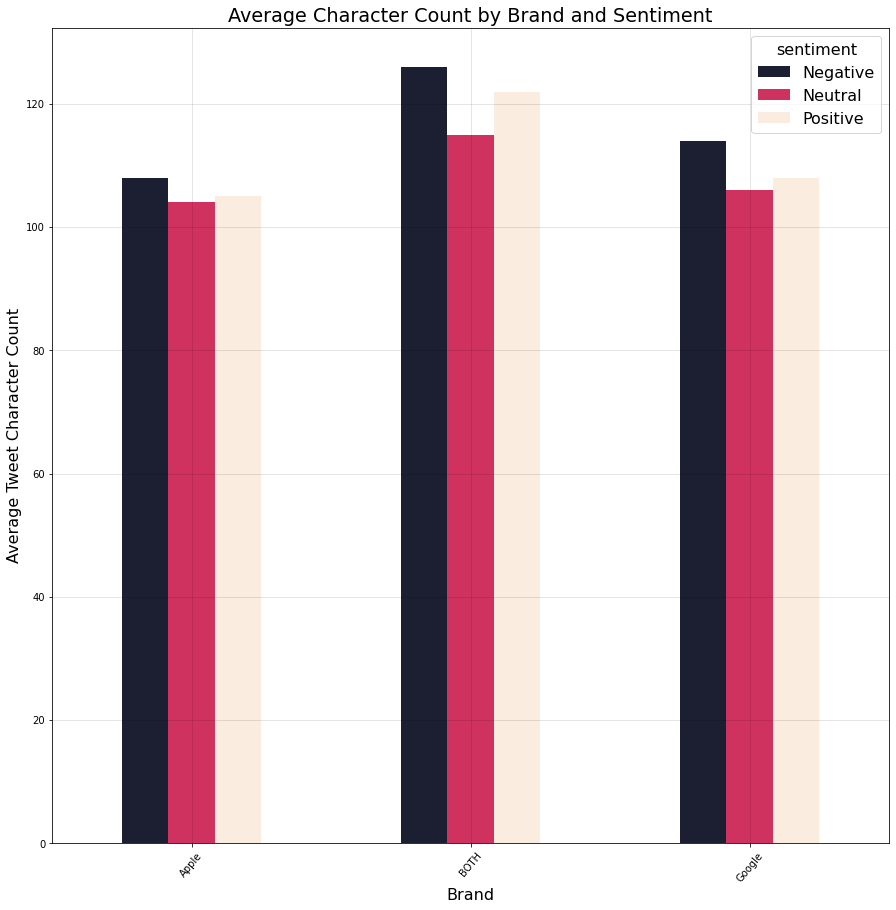

In [144]:
wordcount_by_sentiment.unstack().plot.bar(fontsize=10, rot=50, alpha = 0.90, figsize=(15,15), colormap='rocket', title='Average Character Count by Brand and Sentiment')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Brand')
plt.ylabel('Average Tweet Character Count')
plt.show()

### Q3 Insights/Recommendations:
*Brand sentiment breakdown:
    * Both Apple and Google have many more Positive tweets than Negative (TODO: get percentages)
    * Both brands have many, many more Neutral tweets than Postive and Negative combined (TODO: get percentages)
    * TODO: see if the two brands have similar Postitive to Negative ratios
* Average Character Count:
    * When looking at the average character counts, we see a higher average character count for Negative tweets than any other sentiment. We also see a slightly higher average character count for Positive tweets than Neutral tweets (very slight). This is true across brands.
    * Character or word count may be a useful feature for classification modeling.

## Future Work